# Lead Scoring Case Study

In [6]:
# basic libraries to work on the dataframe
import pandas as pd
import numpy as np
# data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

In [7]:
pwd

'c:\\Users\\Suman\\Downloads\\lead-scoring-case-study\\lead-scoring-case-study-v-1'

## Reading and Understanding Data

In [8]:
#Reading the data file using pandas
df = pd.read_csv('Leads.csv')

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [9]:
# check the shape of the dataset
df.shape

(9240, 37)

In [10]:
# check statistics for numerical columns
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [11]:
# check whether there are any duplicates
df.duplicated().sum()

0

In [12]:
#Lets have a look at all the columns, their datatypes and also get an idea of null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Observations**
* A large number of columns have null values. Those columns should ideally be dropped
* `Prospect ID` and `Lead Number` both serve the same purpose. They are both unique identifiers. We will drop `Prospect ID`
* Column names are just too long. We will modify the column names
* Few categorical columns have "Select" in their entries. Those select are essentially null values because Select appears when someone does not select anything from the dropdown

## Data Cleaning

### Rename column names

* Long column names make analysis tiring as one has to always refer to column names. Also has impact on charts created later on
* Ideally, we should follow python's preferred Snakecase nomenclature

In [13]:
# change nomenclature to snakecase
df.columns = df.columns.str.replace(' ', '_').str.lower()

# test
df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [14]:
# shorten column names
df.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

df.head(1)

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,source,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,tags,lead_quality,supply_chain_content_updates,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified


### Drop `prospect_id` column

In [15]:
df.drop('prospect_id', axis = 1, inplace = True)

### Replace "Select" category with null values

In [16]:
# Select all non-numeric columns
df_obj = df.select_dtypes(include='object')

# Find out columns that have "Select"
s = lambda x: x.str.contains('Select', na=False)
l = df_obj.columns[df_obj.apply(s).any()].tolist()
print (l)

['specialization', 'source', 'lead_profile', 'city']


There are 4 columns that contains `Select`, which are effectively null values. We are going to make that change 

In [17]:
# select all the columns that have a "Select" entry
sel_cols = ['specialization', 'source', 'lead_profile', 'city']

# replace values
df[sel_cols] = df[sel_cols].replace('Select', np.NaN)

### Handle null values and sales generated columns

- Given there are a number of columns with very high number of null entries, let's calculate the percentage of null values in each column, and take a decision from there.
- Furthermore, we can also drop Sales generated columns because those are the data entries that are made after the sales team has connected with the student. Those data have no bearing to the purpose of our model ie. providing lead score. The columns are
    * `tags`
    * `lead_quality`
    * all `asymmetrique` columns
    * `last_activity`
    * `last_notable_activity`

In [18]:
# Calculate percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
last_activity                   1.11
country                        26.63
specialization                 36.58
source                         78.46
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
tags                           36.29
lead_quality                   51.59
supply_chain_content_updates    0.00
dm_content_updates              0.00
l

**Observation**: As can be seen, there are quite a few columns with high number of missing data. Since there are no ways to get data back from reliable sources, we can drop all those columns that have missing values > 40%

#### Drop columns that have null values > 40% or Sales generated columns

In [19]:
df.drop(['source', 'lead_quality', 'lead_profile', 'asymmetrique_activity_index', 
                      'asymmetrique_profile_index', 'asymmetrique_activity_score', 'asymmetrique_profile_score',
        'tags', 'last_activity', 'last_notable_activity'], 
        axis = 1, inplace = True)

df.head(1)

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,country,specialization,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,supply_chain_content_updates,dm_content_updates,city,cheque_payment,mastering_interview
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No


In [20]:
# Lets look at what are we left with
# Calculate percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
country                        26.63
specialization                 36.58
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
supply_chain_content_updates    0.00
dm_content_updates              0.00
city                           39.71
cheque_payment                  0.00
mastering_interview             0.00
dtype: float64

**Observations**
<br>There are five columns that still have high null values: `country`, `specialization`, `occupation`, `course_selection_reason`, and `city`. We will look at them individually to see what can be done

#### `country` column

In [21]:
df.country.value_counts(normalize = True, dropna = False) * 100

country
India                  70.26
NaN                    26.63
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Bahrain                 0.08
Hong Kong               0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Kuwait                  0.04
South Africa            0.04
Canada                  0.04
Nigeria                 0.04
Germany                 0.04
Sweden                  0.03
Philippines             0.02
Uganda                  0.02
Italy                   0.02
Bangladesh              0.02
Netherlands             0.02
Asia/Pacific Region     0.02
China                   0.02
Belgium                 0.02
Ghana                   0.02
Kenya                   0.01
Sri Lanka               0.01
Tanzania                0.01
Malaysia                0.01
Liberia                 0.01
Switze

**Observation**
<br> The distribution of the data is very heavily skewed, with India + null values = 97% of the total. It is safe to drop this column.

In [22]:
df.drop('country', axis = 1, inplace = True)

#### `course_selection_reason` column

In [23]:
df.course_selection_reason.value_counts(normalize = True, dropna = False) * 100

course_selection_reason
Better Career Prospects     70.65
NaN                         29.32
Flexibility & Convenience    0.02
Other                        0.01
Name: proportion, dtype: float64

**Observation**
<br> The distribution of the data is very heavily skewed, with Better career prospects + null values = approx 100% of the total. It is safe to drop this column.

In [24]:
df.drop('course_selection_reason', axis = 1, inplace = True)

#### `occupation` column

In [25]:
df.occupation.value_counts(normalize = True, dropna = False) * 100

occupation
Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: proportion, dtype: float64

**Observation**
<br> For occupation, we can first combine categories, and then impute proportionally to maintain the distribution and not introduce bias

In [26]:
# combine low representing categories
df.loc[(df.occupation == 'Student') | (df.occupation == 'Other') | (df.occupation == 'Housewife') | 
       (df.occupation == 'Businessman') , 'occupation'] = 'Student and Others'

In [27]:
df.occupation.value_counts(normalize = True) * 100

occupation
Unemployed             85.50
Working Professional   10.78
Student and Others      3.73
Name: proportion, dtype: float64

In [28]:
# impute proportionately
df['occupation'] = df.occupation.fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 
                                                                    'Student and Others'], 
                                                                   p = [0.8550, 0.1078, 0.0372], size = len(df))))

#### `specialization` column

In [29]:
df.specialization.value_counts(normalize = True, dropna = False) * 100

specialization
NaN                                 36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Travel and Tourism                   2.20
Media and Advertising                2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: proportion, dtype: float64

**Observation**
<br> For specialization, we can first combine categories based on the course type, and then impute proportionally to maintain the distribution and not introduce bias

In [30]:
# categorize all management courses
df.loc[(df.specialization == 'Finance Management') | (df.specialization == 'Human Resource Management') | 
       (df.specialization == 'Marketing Management') |  (df.specialization == 'Operations Management') |
       (df.specialization == 'IT Projects Management') | (df.specialization == 'Supply Chain Management') |
       (df.specialization == 'Healthcare Management') | (df.specialization == 'Hospitality Management') |
       (df.specialization == 'Retail Management') , 'specialization'] = 'Management Specializations'

# categorize all busines courses
df.loc[(df.specialization == 'Business Administration') | (df.specialization == 'International Business') | 
       (df.specialization == 'Rural and Agribusiness') | (df.specialization == 'E-Business') 
        , 'specialization'] = 'Business Specializations'

# categorize all industry courses
df.loc[(df.specialization == 'Banking, Investment And Insurance') | (df.specialization == 'Media and Advertising') |
       (df.specialization == 'Travel and Tourism') | (df.specialization == 'Services Excellence') |
       (df.specialization == 'E-COMMERCE'), 'specialization'] = 'Industry Specializations'

In [31]:
df.specialization.value_counts(normalize = True) * 100

specialization
Management Specializations   72.58
Industry Specializations     15.29
Business Specializations     12.13
Name: proportion, dtype: float64

In [32]:
# impute proportionately
df['specialization'] = df.specialization.fillna(pd.Series(np.random.choice(['Management Specializations',  
                                                    'Business Specializations', 'Industry Specializations'], 
                                                                   p = [0.7258, 0.1213, 0.1529 ], size = len(df))))

#### `city` column

In [33]:
df.city.value_counts(normalize = True, dropna = False) * 100

city
NaN                           39.71
Mumbai                        34.87
Thane & Outskirts              8.14
Other Cities                   7.42
Other Cities of Maharashtra    4.95
Other Metro Cities             4.11
Tier II Cities                 0.80
Name: proportion, dtype: float64

**Observations**
We will categorize cities based on logical decisions and impute proportionately

In [34]:
# categorize all non-mumbai, but Maharashtra cities
df.loc[(df.city == 'Thane & Outskirts') | (df.city == 'Other Cities of Maharashtra'), 
       'city'] = 'Non-Mumbai Maharashtra Cities'

# categorize all other cities
df.loc[(df.city == 'Other Cities') | (df.city == 'Other Metro Cities') | (df.city == 'Tier II Cities') , 
       'city'] = 'Non-Maharashtra Cities'


In [35]:
df.city.value_counts(normalize = True) * 100

city
Mumbai                          57.84
Non-Mumbai Maharashtra Cities   21.70
Non-Maharashtra Cities          20.46
Name: proportion, dtype: float64

In [36]:
# impute proportionately
df['city'] = df.city.fillna(pd.Series(np.random.choice(['Mumbai', 'Non-Mumbai Maharashtra Cities', 
                                                                    'Non-Maharashtra Cities'], 
                                                                   p = [0.5784, 0.2170, 0.2046 ], size = len(df))))

### Handle categorical columns with low number of missing values and low representation of categories

In this step, we will go through the rest of the categorical columns one by one and
* Merge categories that have low representation
* Impute the missing values

In [37]:
(df.isnull().sum() / df.shape[0]) * 100

lead_number                    0.00
lead_origin                    0.00
lead_source                    0.39
do_not_email                   0.00
do_not_call                    0.00
converted                      0.00
total_visits                   1.48
time_on_website                0.00
page_views_per_visit           1.48
specialization                 0.00
occupation                     0.00
search                         0.00
magazine                       0.00
newspaper_article              0.00
x_education_forums             0.00
newspaper                      0.00
digital_advertisement          0.00
through_recommendations        0.00
courses_updates                0.00
supply_chain_content_updates   0.00
dm_content_updates             0.00
city                           0.00
cheque_payment                 0.00
mastering_interview            0.00
dtype: float64

In [38]:
# determine unique values for all object datatype columns
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 5
lead_source = 21
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


**Observation**
<br> As can be seen from the above output, the categorical columns (i.e. number of unique values > 2) are:
* `lead_origin`
* `lead_source`

#### `lead_origin` column

In [39]:
df.lead_origin.value_counts(normalize = True, dropna = False) * 100

lead_origin
Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: proportion, dtype: float64

In [40]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
df.loc[(df.lead_origin == 'Lead Import') | (df.lead_origin == 'Quick Add Form') | (df.lead_origin == 'Lead Add Form')
       , 'lead_origin'] = 'Lead Add Form and Others'

#### `lead_source` column

In [41]:
df.lead_source.value_counts(normalize = True, dropna = False) * 100

lead_source
Google              31.04
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
NaN                  0.39
bing                 0.06
google               0.05
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: proportion, dtype: float64

In [42]:
# Lets impute the missing values with the mode of data i.e. clearly 'Google'
df.lead_source.fillna(df.lead_source.mode()[0], inplace=True)

In [43]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
df['lead_source'] = df['lead_source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference')) 
                                            else 'Other Social Sites')

### Handle Binary columns

* Drop those columns that have significant data imbalance
* Drop all those columns that have only 1 unique entry

In [44]:
# determine unique values
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 3
lead_source = 6
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


**Observation**
* The following columns can be dropped as they have just 1 unique values
    * `magazine`
    * `course_updates`
    * `supply_chain_content_updates`
    * `dm_content_updates`
    * `cheque_payment`
    
 Let's now check the data imbalance for the rest of the columns

In [45]:
# select rest of the binary columns in a new dataframe
df_bin = df[['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']]

# see value counts for each of the columns
for i in df_bin.columns:
    x = (df_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

do_not_email
No    92.06
Yes    7.94
Name: proportion, dtype: float64

do_not_call
No    99.98
Yes    0.02
Name: proportion, dtype: float64

search
No    99.85
Yes    0.15
Name: proportion, dtype: float64

newspaper_article
No    99.98
Yes    0.02
Name: proportion, dtype: float64

x_education_forums
No    99.99
Yes    0.01
Name: proportion, dtype: float64

newspaper
No    99.99
Yes    0.01
Name: proportion, dtype: float64

digital_advertisement
No    99.96
Yes    0.04
Name: proportion, dtype: float64

through_recommendations
No    99.92
Yes    0.08
Name: proportion, dtype: float64

mastering_interview
No    68.74
Yes   31.26
Name: proportion, dtype: float64



**Observations**
<br> Because of heavy data imbalance, we can drop the following columns as well
* `do_not_call`
* `search`
* `newspaper_article`
* `x_education_forums`
* `newspaper`
* `digital_advertisement`
* `through_recommendations`

In [46]:
drop_bin = ['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'magazine', 'courses_updates', 
           'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment']

df.drop(drop_bin, axis = 1, inplace = True)

### Handle Numerical columns

#### `lead_number` column: change datatype

`lead_number` column is a unique identifier for each leads. Therefore, aggregations won't be of any relevance. We should change it to object

In [47]:
df.lead_number = df.lead_number.astype('object')

#### `total_visits` column

For this column, we need to handle the missing values, and can convert the datatype to integer since visits can't be decimal

In [48]:
df.total_visits.fillna(df.total_visits.median(), inplace=True)
df.total_visits = df.total_visits.astype('int')

#### `page_views_per_visit` column

Handle missing values

In [49]:
df.page_views_per_visit.fillna(df.page_views_per_visit.median(), inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   object 
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   do_not_email          9240 non-null   object 
 4   converted             9240 non-null   int64  
 5   total_visits          9240 non-null   int32  
 6   time_on_website       9240 non-null   int64  
 7   page_views_per_visit  9240 non-null   float64
 8   specialization        9240 non-null   object 
 9   occupation            9240 non-null   object 
 10  city                  9240 non-null   object 
 11  mastering_interview   9240 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 830.3+ KB


## Exploratory Data Analysis

### Numerical columns

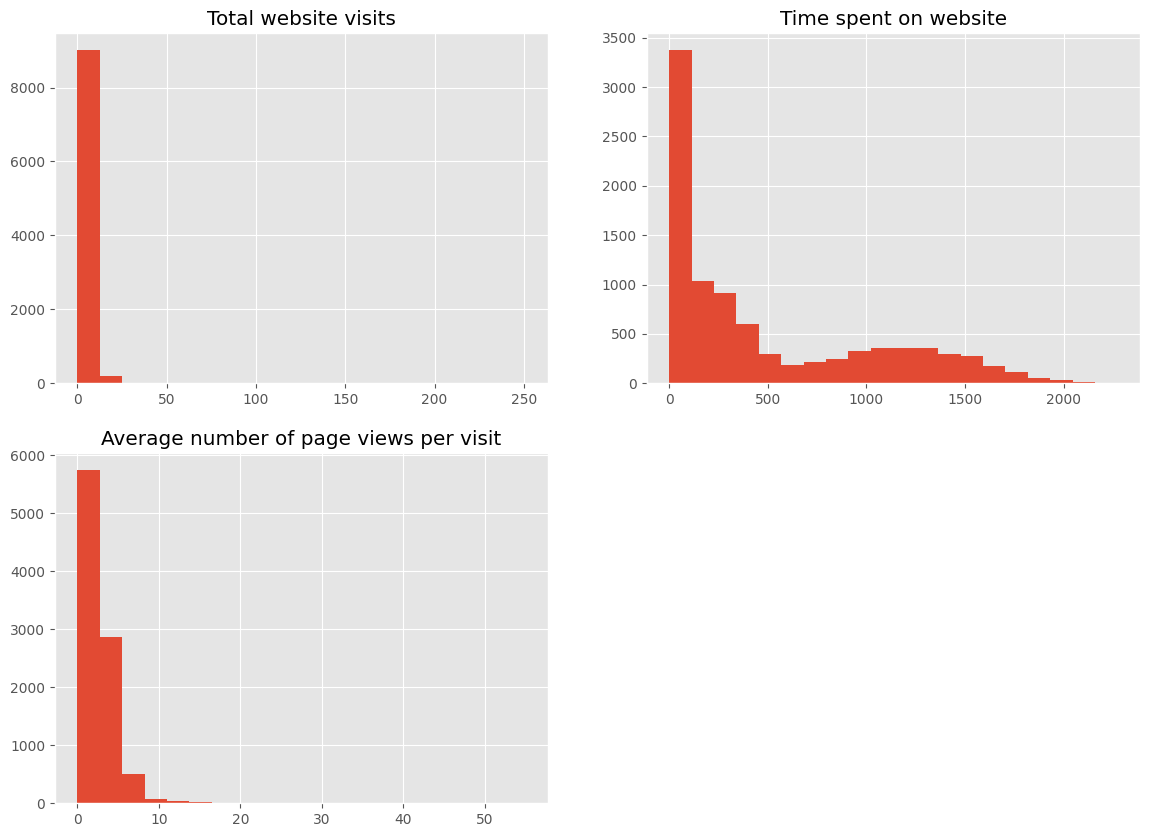

In [51]:
# Set style
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(df.total_visits, bins = 20)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(df.time_on_website, bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(df.page_views_per_visit, bins = 20)
plt.title('Average number of page views per visit')

plt.show()

**Observations**
- High peaks and skewed data. There might be a possibility of outliers. We will check them next

#### Heatmap

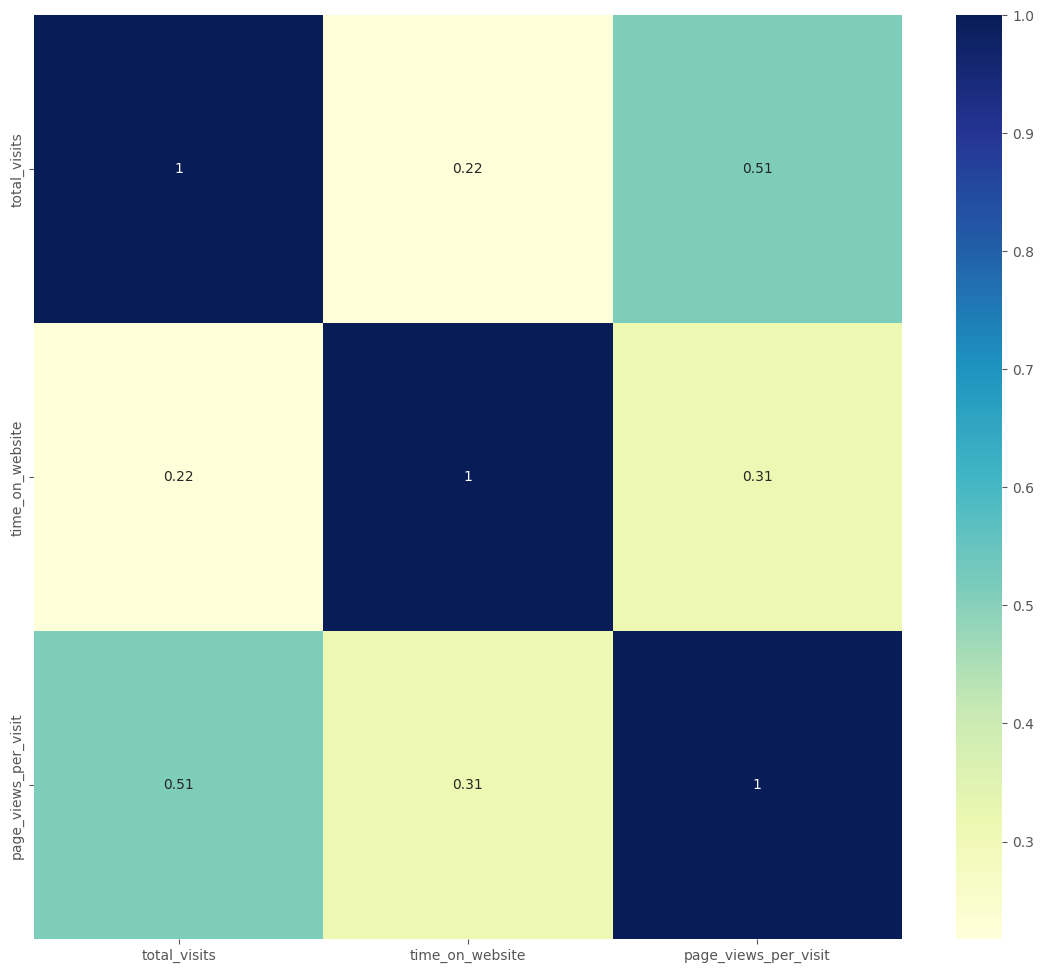

In [52]:
plt.figure(figsize = (14,12))
sns.heatmap(df[['total_visits', 'time_on_website', 'page_views_per_visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

**Observations**: No significaqnt correlation such that columns can be dropped

#### Check for outliers

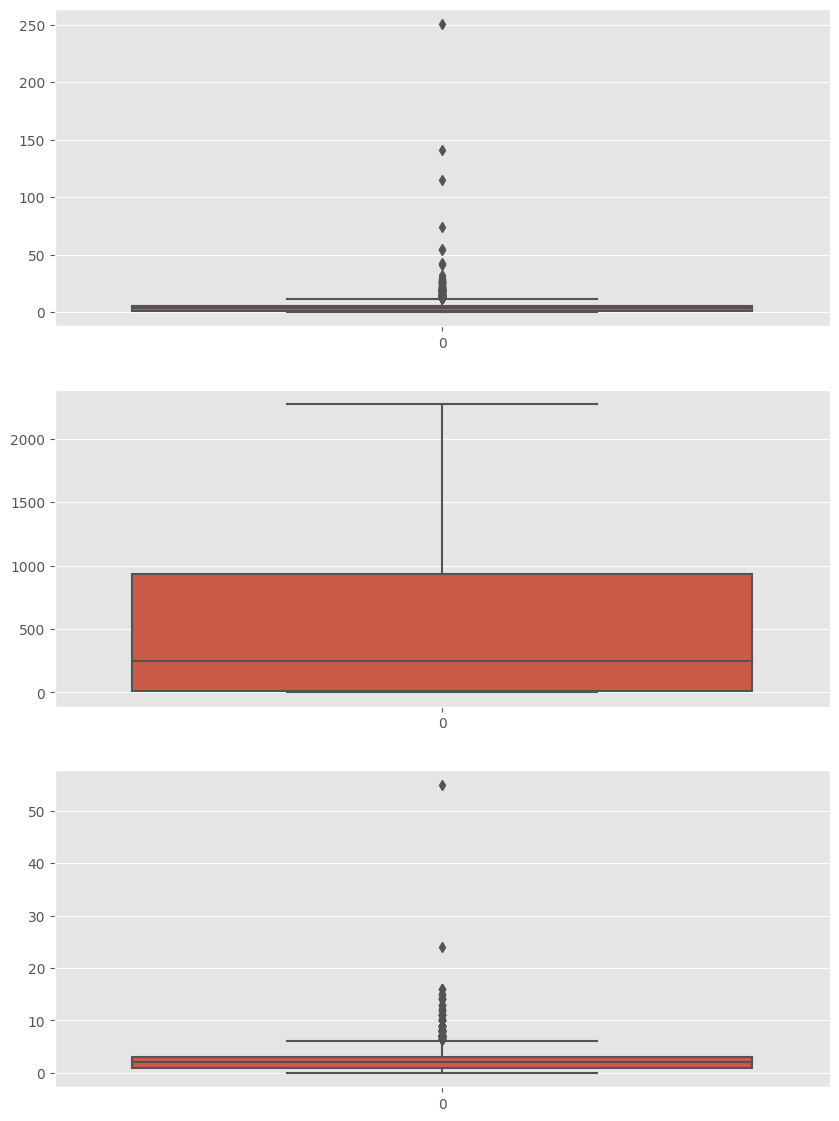

In [53]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(df.total_visits)

plt.subplot(3,1,2)
sns.boxplot(df.time_on_website)

plt.subplot(3,1,3)
sns.boxplot(df.page_views_per_visit)
plt.show()

**Observations**

* Looking at both the box plots and the statistics, there are upper bound outliers in both `total_visits` and `page_views_per_visit` columns. We can also see that the data can be capped at 99 percentile.

### Categorical columns

#### Lead Origin

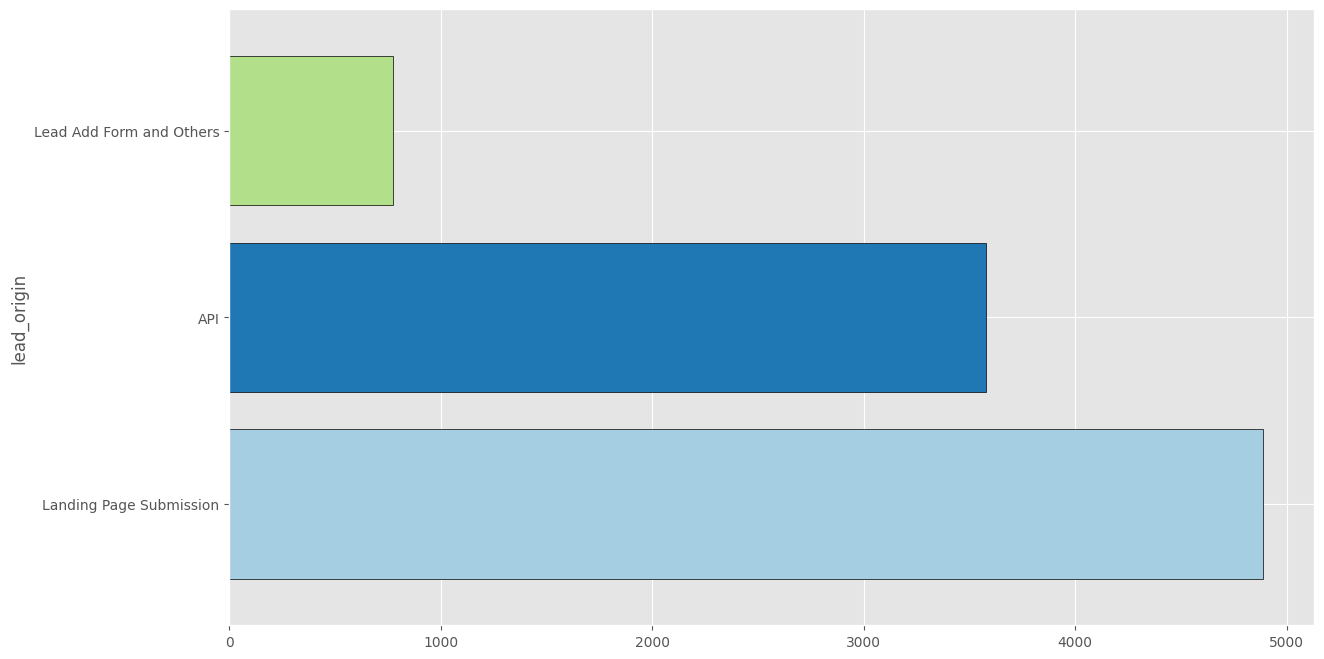

In [54]:
plt.figure(figsize = (14, 8))

df.groupby('lead_origin')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

In [55]:
df.head(1)

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,No,0,0,0,0.00,Management Specializations,Unemployed,Non-Mumbai Maharashtra Cities,No


#### Lead Source

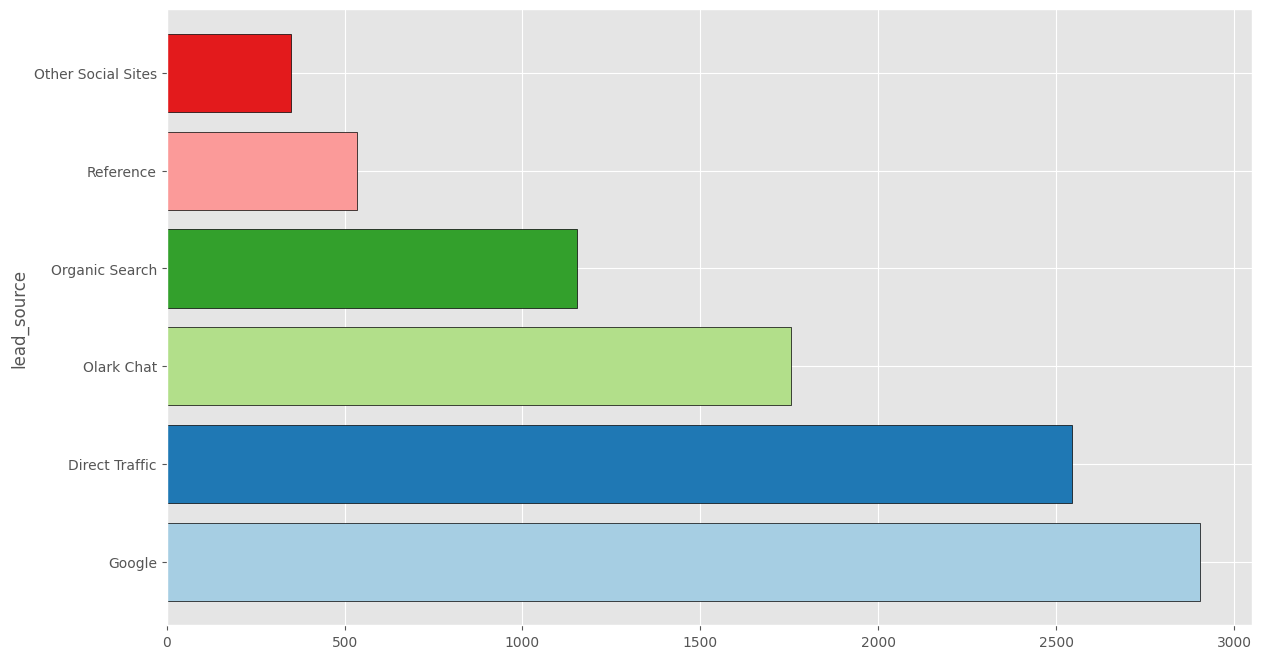

In [56]:
plt.figure(figsize = (14, 8))

df.groupby('lead_source')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

#### Specialization

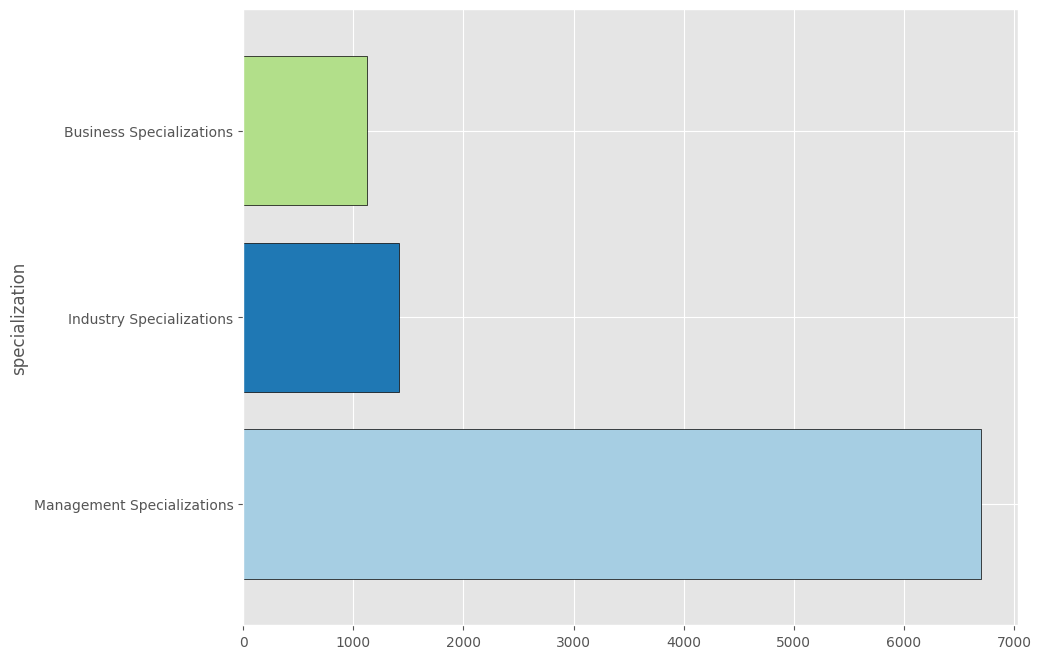

In [57]:
plt.figure(figsize = (10, 8))

df.groupby('specialization')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

Most of the speciliazation taken are management

#### Occupation

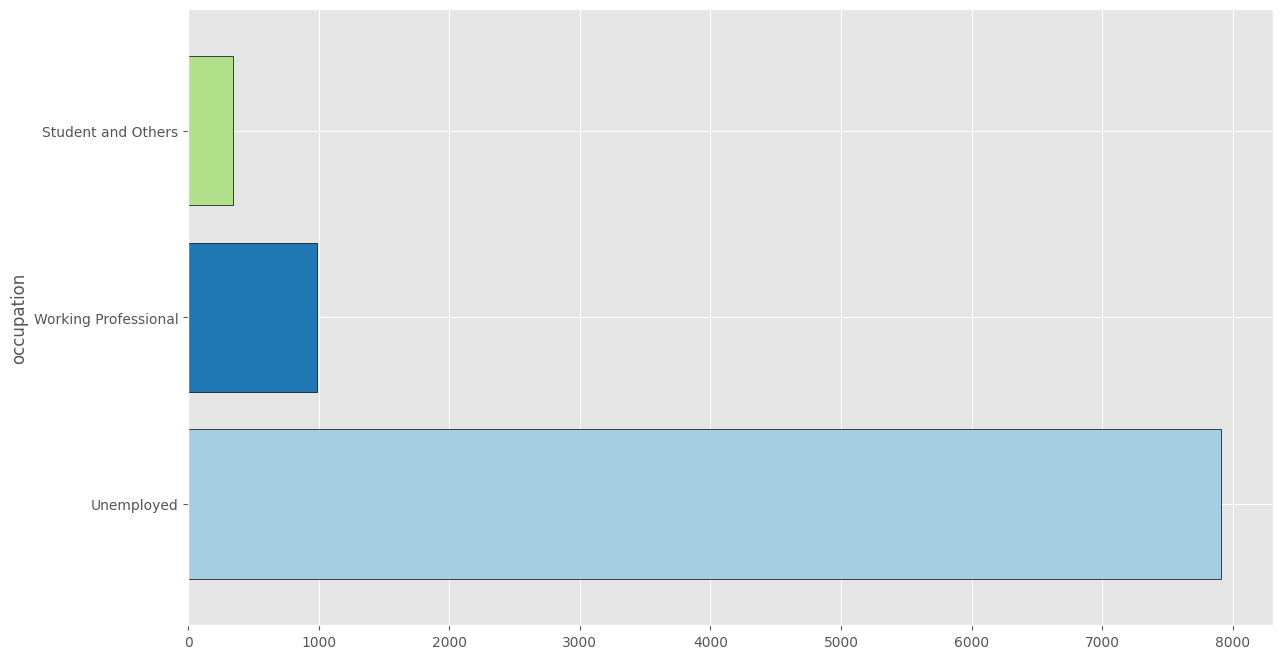

In [58]:
plt.figure(figsize = (14, 8))

df.groupby('occupation')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

Unempployed users are the most significant leads

#### City

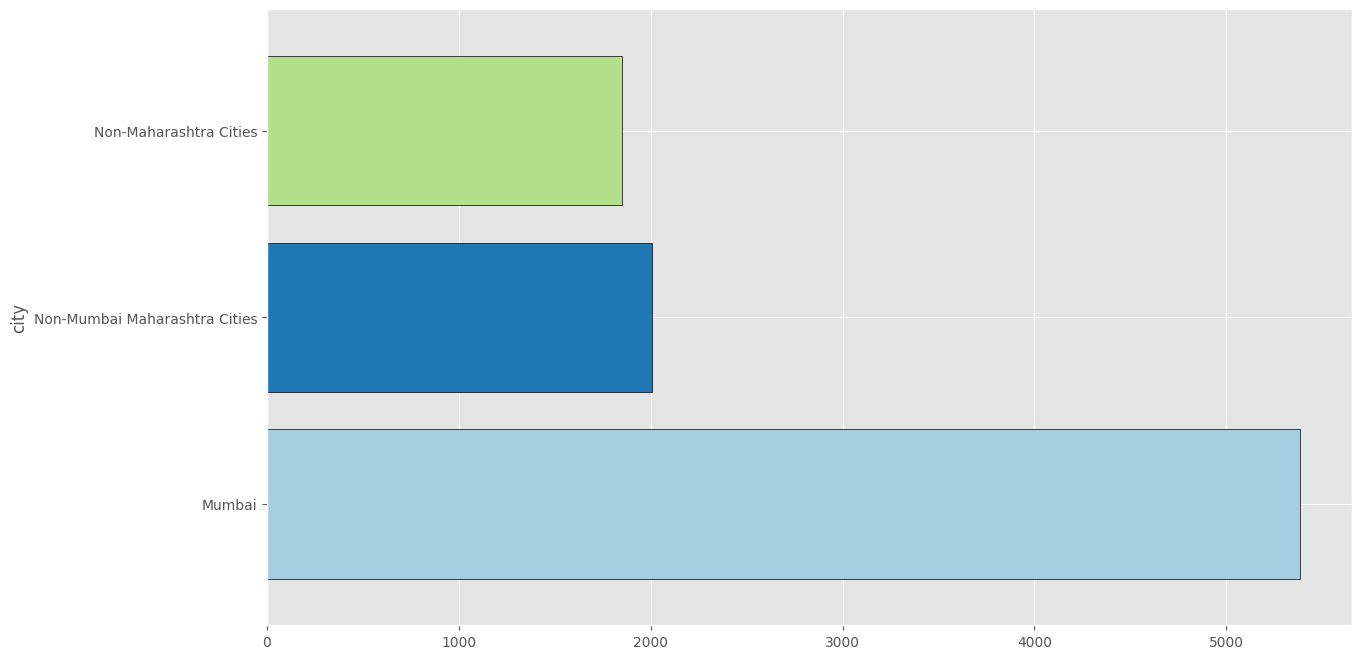

In [59]:
plt.figure(figsize = (14, 8))

df.groupby('city')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

Mumbai in particular and Maharashtra in general dominates the lead. This is likely due to the fact that the courses are based in Mumbai

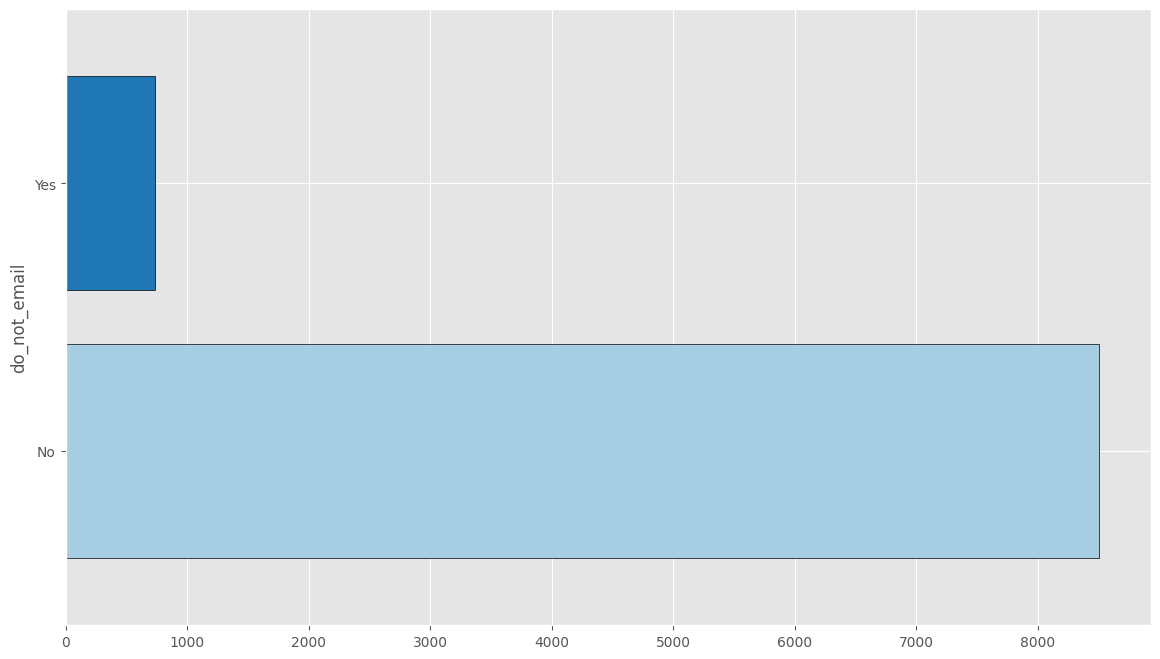

In [60]:
plt.figure(figsize = (14, 8))

df.groupby('do_not_email')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

## Data Preparation

### Converting Binary (Yes/No) to 0/1

In [61]:
# determine unique values
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_number = 9240
lead_origin = 3
lead_source = 6
do_not_email = 2
specialization = 3
occupation = 3
city = 3
mastering_interview = 2


We have two binary columns: `do_not_email`, `mastering_interview`

In [62]:
binlist = ['do_not_email', 'mastering_interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[binlist] = df[binlist].apply(binary_map)

# check the operation was success
df.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,0,0,0,0,0.00,Management Specializations,Unemployed,Non-Mumbai Maharashtra Cities,0
1,660728,API,Organic Search,0,0,5,674,2.50,Management Specializations,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.00,Business Specializations,Student and Others,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.00,Industry Specializations,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.00,Management Specializations,Unemployed,Mumbai,0


### Creating dummy variable for categorical columns

Categorical columns are: `lead_origin`, `lead_source`, `specialization`, `occupation`, `city`

In [63]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['lead_origin', 'lead_source', 'specialization', 'occupation', 'city']], drop_first = True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [64]:
# Dropping the columns for which dummies have been created
df.drop(['lead_origin', 'lead_source', 'specialization', 'occupation', 'city'], axis = 1, inplace = True)

df.head()

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,660737,0,0,0,0,0.00,0,False,False,False,True,False,False,False,False,True,True,False,False,True
1,660728,0,0,5,674,2.50,0,False,False,False,False,True,False,False,False,True,True,False,False,False
2,660727,0,1,2,1532,2.00,1,True,False,False,False,False,False,False,False,False,False,False,False,False
3,660719,0,0,1,305,1.00,0,True,False,False,False,False,False,False,True,False,True,False,False,False
4,660681,0,1,2,1428,1.00,0,True,False,True,False,False,False,False,False,True,True,False,False,False


### Outliers Treatment

In [65]:
num_cols = df[['total_visits', 'time_on_website', 'page_views_per_visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,total_visits,time_on_website,page_views_per_visit
count,9240.00,9240.00,9240.00
mean,3.44,487.70,2.36
std,4.82,548.02,2.15
min,0.00,0.00,0.00
25%,1.00,12.00,1.00
50%,3.00,248.00,2.00
75%,5.00,936.00,3.00
90%,7.00,1380.00,5.00
95%,10.00,1562.00,6.00
99%,17.00,1840.61,9.00


In [66]:
# capping at 99 percentile
df.total_visits.loc[df.total_visits >= df.total_visits.quantile(0.99)] = df.total_visits.quantile(0.99)
df.page_views_per_visit.loc[df.page_views_per_visit >= 
                            df.page_views_per_visit.quantile(0.99)] = df.page_views_per_visit.quantile(0.99)

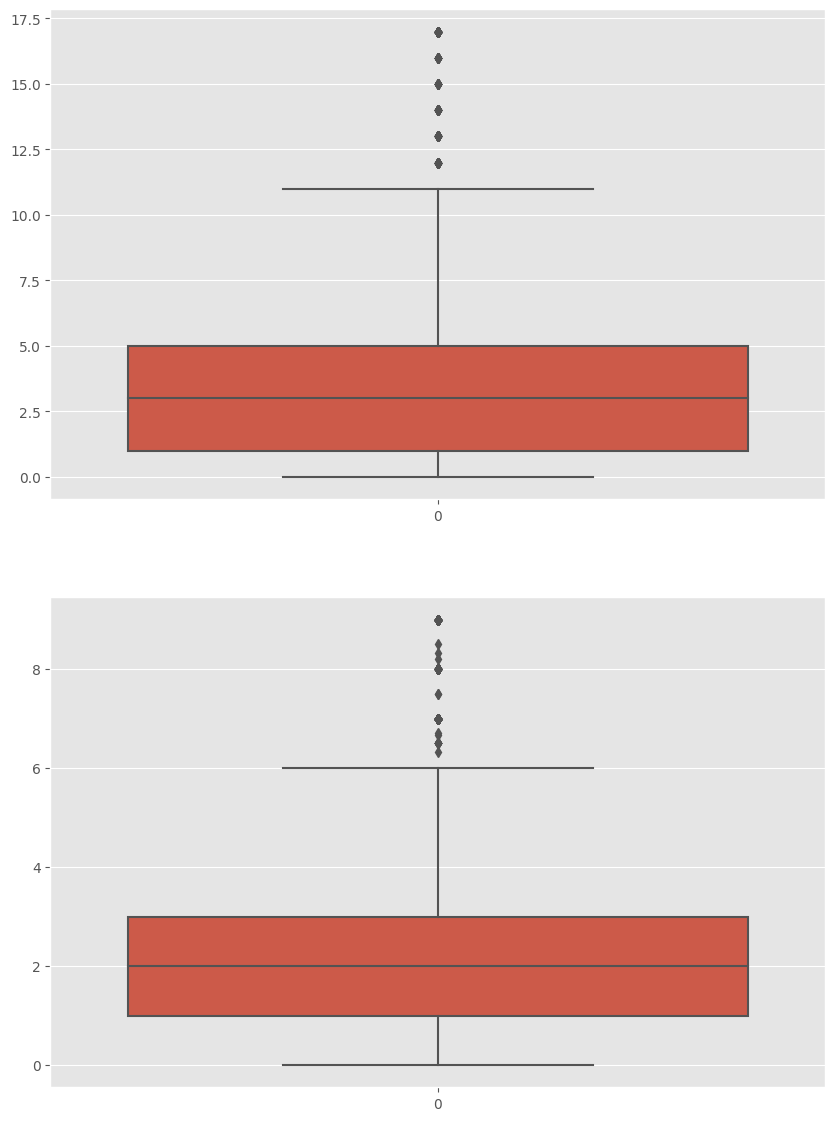

In [67]:
plt.figure(figsize = (10, 14))

plt.subplot(2,1,1)
sns.boxplot(df.total_visits)

plt.subplot(2,1,2)
sns.boxplot(df.page_views_per_visit)
plt.show()

As we can see, we were able to significantly reduce the number of outliers by capping

### Test-Train Split

In [68]:
# Putting feature variable to X
X = df.drop(['lead_number', 'converted'], axis=1)

X.head(1)

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,0,0,0,0.00,0,False,False,False,True,False,False,False,False,True,True,False,False,True


In [69]:
# Putting response variable to y
y = df['converted']

y.head(1)

0    0
Name: converted, dtype: int64

In [70]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [71]:
scaler = StandardScaler()

X_train[['total_visits','time_on_website','page_views_per_visit']] = scaler.fit_transform(
    X_train[['total_visits','time_on_website','page_views_per_visit']])

X_train.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
1871,0,-1.02,-0.89,-1.18,0,False,False,False,True,False,False,False,False,True,True,False,True,False
6795,0,0.21,0.01,-0.50,1,True,False,False,False,False,False,False,False,True,True,False,True,False
3516,0,0.51,-0.69,0.09,0,False,False,False,True,False,False,False,False,True,True,False,False,False
8105,0,0.51,1.37,1.36,0,True,False,True,False,False,False,False,True,False,True,False,False,False
3934,0,-1.02,-0.89,-1.18,0,False,False,False,True,False,False,False,False,True,True,False,False,False


In [72]:
# checking the conversion rate
conversion = (sum(df['converted'])/len(df['converted'].index))*100
conversion

38.53896103896104

The conversion rate is 38.5%

### Looking at correlations

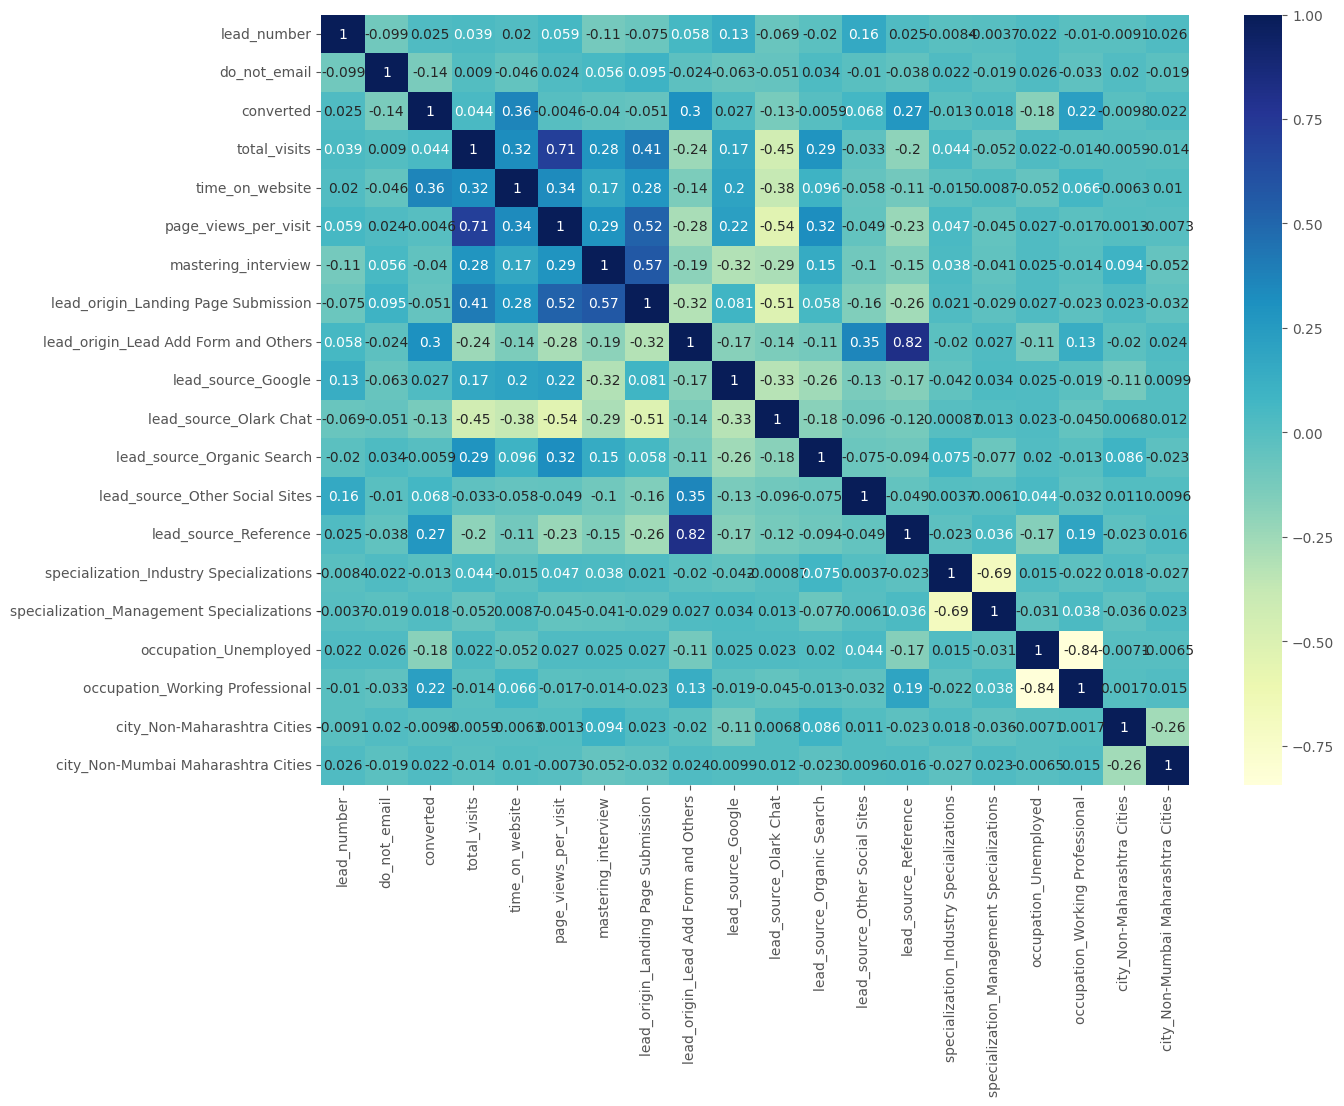

In [73]:
# Let's see the correlation matrix 
plt.figure(figsize = (14,10))       
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

#### Drop highly correlated dummy variables

In [74]:
X_test.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

X_train.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

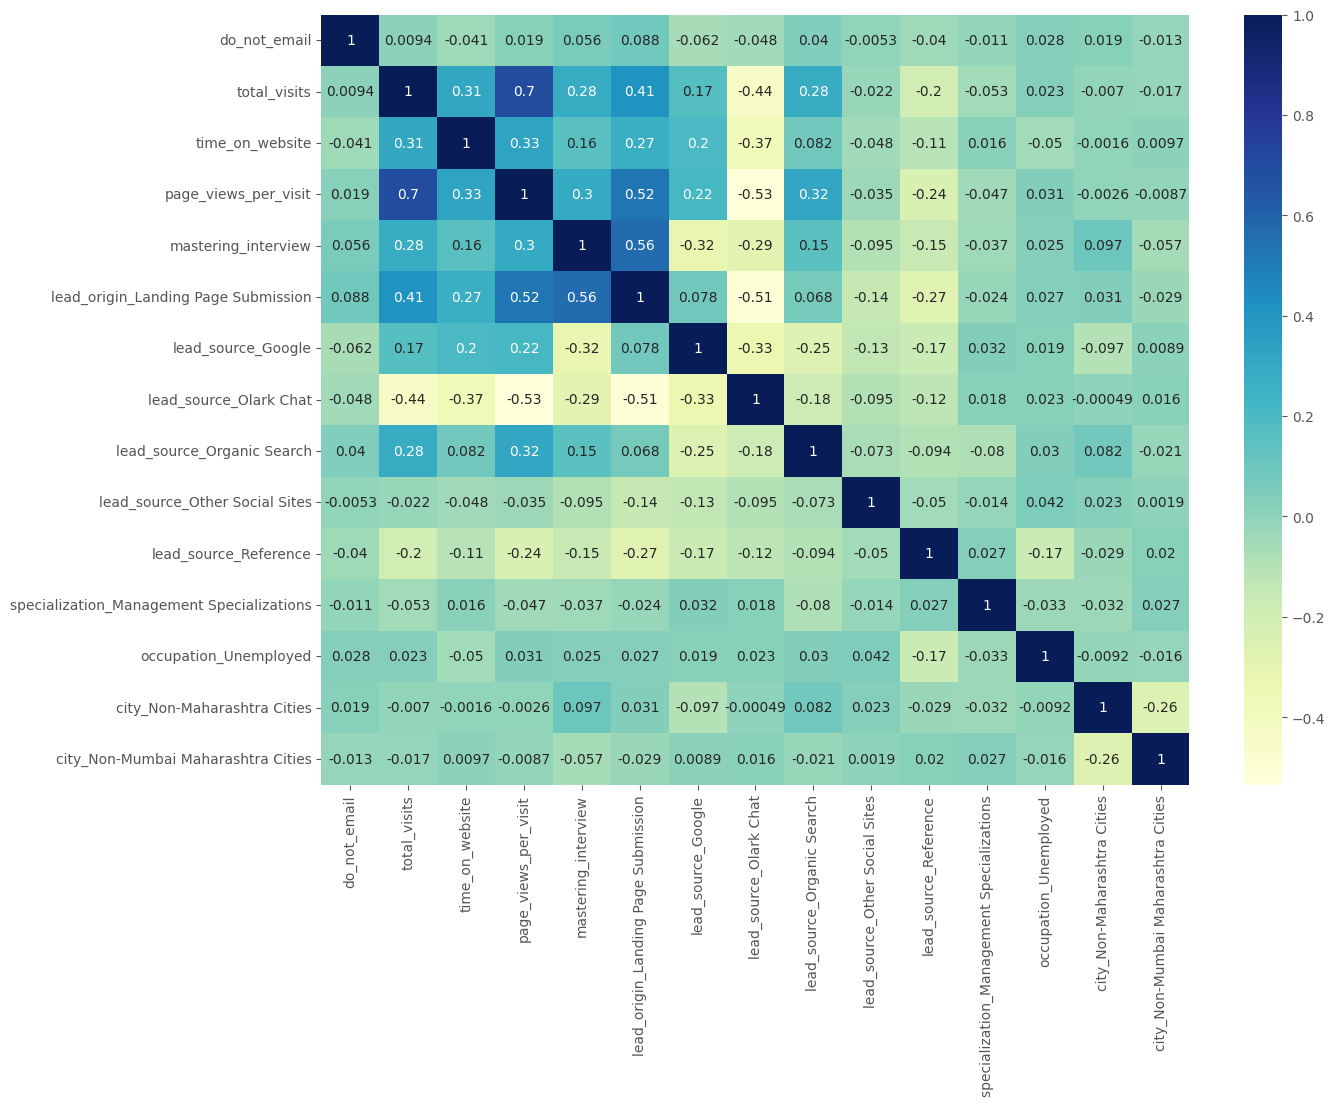

In [75]:
## lets check the correlation matrix again
plt.figure(figsize = (14,10))       
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

## Model Building

In [135]:
X_train
X_train = X_train.replace({True: 1, False: 0})

In [136]:
np.asarray(X_train)


array([[ 0.        , -1.02259473, -0.88537077, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.20537328,  0.00571641, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.51236529, -0.6914175 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -1.02259473, -0.88537077, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        , -0.40861072, -0.44989079, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        , -1.02259473, -0.88537077, ...,  1.        ,
         0.        ,  0.        ]])

### Model 1: All variables

In [185]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3302.7
Date:                Tue, 17 Oct 2023   Deviance:                       6605.3
Time:                        19:36:46   Pearson chi2:                 6.64e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2652
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.2476      0.146     -1.696      0.090      -0.534       0.039
do_not_email                                 -1.2263      0.144     -8.498      0.000      -1.509      -0.943
total_visits                                  0.1406      0.042      3.361      0.001       0.059       0.223
time_on_website                               1.0441      0.036     29.298      0.000       0.974       1.114
page_views_per_visit                         -0.1864      0.048     -3.846      0.000      -0.281      -0.091
mastering_interview                           0.0015      0.094      0.016      0.987      -0.183       0.186
lead_origin_Landing Page Submission          -0.0049      0.092     -0.053      0.958      -0.186       0.176
lead_source_Google                            0.3574      0.100      3.560      0.000       0.161       0.554
lead_source_Olark Chat                        0.6667      0.136      4.886      0.000       0.399       0.934
lead_source_Organic Search                    0.2355      0.116      2.031      0.042       0.008       0.463
lead_source_Other Social Sites                1.6282      0.175      9.294      0.000       1.285       1.972
lead_source_Reference                         3.9493      0.221     17.874      0.000       3.516       4.382
specialization_Management Specializations     0.0031      0.069      0.045      0.964      -0.132       0.138
occupation_Unemployed                        -0.9026      0.086    -10.490      0.000      -1.071      -0.734
city_Non-Maharashtra Cities                   0.0280      0.079      0.355      0.722      -0.127       0.183
city_Non-Mumbai Maharashtra Cities           -0.0247      0.077     -0.322      0.748      -0.175       0.126
=============================================================================================================
"""

In [186]:
# Get the coefficients of the model
coefficients = logm1.params

# Sort the coefficients by absolute values in descending order
sorted_coefficients = coefficients.abs().sort_values(ascending=False)

# Get the top three variables
top_three_variables = sorted_coefficients.index[:3]

# Display the top three variables
print("Top three variables contributing to lead conversion:")
print(top_three_variables)


AttributeError: 'GLM' object has no attribute 'params'

### Feature selection using RFE

In [138]:
# initiate logistic regression
logreg = LogisticRegression()

# initiate rfe
rfe = RFE(logreg)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [139]:
rfe.support_

array([ True, False,  True, False, False, False,  True,  True, False,
        True,  True, False,  True, False, False])

In [140]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('total_visits', False, 4),
 ('time_on_website', True, 1),
 ('page_views_per_visit', False, 3),
 ('mastering_interview', False, 8),
 ('lead_origin_Landing Page Submission', False, 5),
 ('lead_source_Google', True, 1),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', False, 2),
 ('lead_source_Other Social Sites', True, 1),
 ('lead_source_Reference', True, 1),
 ('specialization_Management Specializations', False, 9),
 ('occupation_Unemployed', True, 1),
 ('city_Non-Maharashtra Cities', False, 6),
 ('city_Non-Mumbai Maharashtra Cities', False, 7)]

In [141]:
# assign columns
col = X_train.columns[rfe.support_]

In [142]:
# check what columns were not selected by RFE
X_train.columns[~rfe.support_]

Index(['total_visits', 'page_views_per_visit', 'mastering_interview',
       'lead_origin_Landing Page Submission', 'lead_source_Organic Search',
       'specialization_Management Specializations',
       'city_Non-Maharashtra Cities', 'city_Non-Mumbai Maharashtra Cities'],
      dtype='object')

### Model 2: Assessing the model with statsmodel

In [143]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6460
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3314.0
Date:                Tue, 17 Oct 2023   Deviance:                       6627.9
Time:                        19:26:50   Pearson chi2:                 6.67e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2626
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.2053      0.089     -2.300      0.021      -0.380      -0.030
do_not_email                      -1.2220      0.144     -8.491      0.000      -1.504      -0.940
time_on_website                    1.0397      0.035     29.484      0.000       0.971       1.109
lead_source_Google                 0.2797      0.071      3.945      0.000       0.141       0.419
lead_source_Olark Chat             0.6915      0.094      7.341      0.000       0.507       0.876
lead_source_Other Social Sites     1.5994      0.153     10.465      0.000       1.300       1.899
lead_source_Reference              3.9651      0.197     20.111      0.000       3.579       4.352
occupation_Unemployed             -0.8909      0.086    -10.395      0.000      -1.059      -0.723
==================================================================================================
"""

In [148]:
df

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,660737,0,0,0,0,0.00,0,False,False,False,True,False,False,False,False,True,True,False,False,True
1,660728,0,0,5,674,2.50,0,False,False,False,False,True,False,False,False,True,True,False,False,False
2,660727,0,1,2,1532,2.00,1,True,False,False,False,False,False,False,False,False,False,False,False,False
3,660719,0,0,1,305,1.00,0,True,False,False,False,False,False,False,True,False,True,False,False,False
4,660681,0,1,2,1428,1.00,0,True,False,True,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,1,8,1845,2.67,0,True,False,False,False,False,False,False,False,True,True,False,False,False
9236,579546,0,0,2,238,2.00,1,True,False,False,False,False,False,False,True,False,True,False,False,False
9237,579545,1,0,2,199,2.00,1,True,False,False,False,False,False,False,False,False,True,False,False,False
9238,579538,0,1,3,499,3.00,0,True,False,True,False,False,False,False,False,True,True,False,True,False


**Lets create empty lists of categorical columns and numerical columns, then we will review the columns one by one and see what needs to be done with each of them**

In [144]:
cat= []
num = []

In [149]:
#Creating a function to get the column details
def details(x):
    print(df[x].value_counts())
    print(df[x].isnull().sum(),'null values')
    print(df[x].isnull().sum()/df.count()['lead_number']*100,'% values are null')

In [150]:
# Do not email column
details('do_not_email')

do_not_email
0    8506
1     734
Name: count, dtype: int64
0 null values
0.0 % values are null


we'll leave this column as is for now, and add this to a new list of binary categorical variables

In [153]:
bi_cat = []
bi_cat.append('do_not_email')

In [155]:
df.columns

Index(['lead_number', 'do_not_email', 'converted', 'total_visits',
       'time_on_website', 'page_views_per_visit', 'mastering_interview',
       'lead_origin_Landing Page Submission',
       'lead_origin_Lead Add Form and Others', 'lead_source_Google',
       'lead_source_Olark Chat', 'lead_source_Organic Search',
       'lead_source_Other Social Sites', 'lead_source_Reference',
       'specialization_Industry Specializations',
       'specialization_Management Specializations', 'occupation_Unemployed',
       'occupation_Working Professional', 'city_Non-Maharashtra Cities',
       'city_Non-Mumbai Maharashtra Cities'],
      dtype='object')

In [156]:
details('total_visits')

total_visits
0     2189
2     1680
3     1443
4     1120
5      783
6      466
1      395
7      309
8      224
9      164
10     114
17      99
11      86
13      48
12      45
14      36
16      21
15      18
Name: count, dtype: int64
0 null values
0.0 % values are null


0.50    3.00
0.95   10.00
0.96   10.00
0.97   11.00
0.98   13.00
0.99   17.00
Name: total_visits, dtype: float64

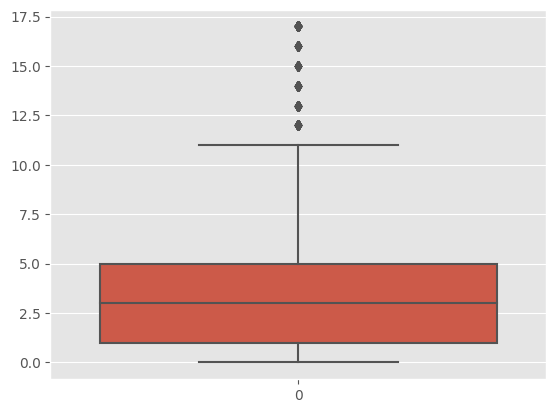

In [159]:
# We can see that there is a lot of outliers here, we can also plot a boxplot to get a visual idea of the same
sns.boxplot(df['total_visits'])
#and see the median(sometimes we impute the null values with median), and 95th to 99th percentiles for the data
df.total_visits.quantile([0.50,0.95,0.96,0.97,0.98,0.99])

Considering the values and outliers here, Let's cap the values at 96th percentile i.e. 10<br>

Also, we will impute the null values with 0 here, we could impute this with median but considering the values might not have been tracked because they haven't logged on to the site, and 0 is also the mode of the column.

In [160]:
df[df['total_visits'].isnull()]['total_visits'] = df['total_visits'].mode()[0]
#df[df.TotalVisits > df.TotalVisits.quantile(0.96)] = df.TotalVisits.quantile(0.96)
#Also add this column to our numerical columns list
num.append('total_visits')

Let's also create a function to cap the outliers if needed in future

In [161]:
def cap(col,typ='right',value=0.95):
    if typ == 'left':
        df[df[col]<df[col].quantile(value)][col] = df[col].quantile(value)
    else:
        df[df[col]>df[col].quantile(value)][col] = df[col].quantile(value)
        

In [163]:
# and capping the column as mentioned earlier
cap('total_visits')

In [164]:
# Lets look at Total Time Spent on Website column
details('time_on_website')

time_on_website
0       2193
60        19
74        18
75        18
127       18
        ... 
1701       1
1952       1
1229       1
1743       1
927        1
Name: count, Length: 1731, dtype: int64
0 null values
0.0 % values are null


In [165]:
###############################################################################
##Also add this column to our numerical columns list
#num.append('Total Time Spent on Website')

Since we also look at the boxplots and percentiles for numberical numbers, lets create a similar details function to include these two pieces of information.

In [166]:
def num_details(x):
    print(df[x].value_counts())
    print(df[x].isnull().sum(),'null values')
    print(df[x].isnull().sum()/df.count()[x]*100,'% values are null')
    print('Percentiles are as follows')
    print(df[x].quantile([0.50,0.95,0.96,0.97,0.98,0.99]))
    sns.boxplot(df[x])

In [168]:
df.columns

Index(['lead_number', 'do_not_email', 'converted', 'total_visits',
       'time_on_website', 'page_views_per_visit', 'mastering_interview',
       'lead_origin_Landing Page Submission',
       'lead_origin_Lead Add Form and Others', 'lead_source_Google',
       'lead_source_Olark Chat', 'lead_source_Organic Search',
       'lead_source_Other Social Sites', 'lead_source_Reference',
       'specialization_Industry Specializations',
       'specialization_Management Specializations', 'occupation_Unemployed',
       'occupation_Working Professional', 'city_Non-Maharashtra Cities',
       'city_Non-Mumbai Maharashtra Cities'],
      dtype='object')

page_views_per_visit
0.00    2189
2.00    1932
3.00    1196
4.00     896
1.00     651
5.00     517
1.50     306
6.00     244
2.50     241
7.00     133
9.00     120
3.50      94
8.00      86
1.33      66
1.67      60
2.33      59
2.67      54
4.50      43
1.75      28
3.33      27
1.25      23
5.50      21
2.25      19
3.67      16
1.80      13
6.50      13
2.75      12
1.40      11
2.20       9
2.80       9
4.33       9
3.25       8
2.17       8
1.60       8
2.40       6
1.20       5
1.43       4
2.60       4
1.83       4
3.40       4
1.71       4
5.67       3
1.57       3
4.25       3
1.38       3
1.78       3
4.75       3
1.23       2
7.50       2
1.14       2
2.71       2
3.75       2
5.40       2
1.56       2
1.22       2
2.83       2
3.60       2
2.22       2
5.25       2
2.09       2
3.20       2
5.33       2
2.45       1
8.33       1
1.48       1
3.82       1
6.67       1
1.54       1
2.13       1
2.14       1
4.40       1
1.19       1
3.38       1
3.80       1
3.29       1
1.17

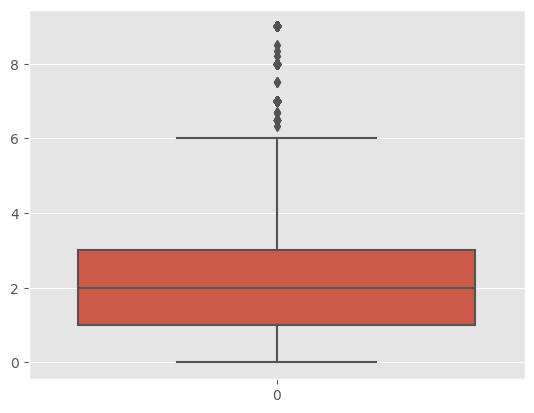

In [169]:
#Lets look at column Page Views Per Visit
num_details('page_views_per_visit')

In [171]:
df[df['page_views_per_visit'].isnull()]['page_views_per_visit'] = df['page_views_per_visit'].mode()[0]
cap('page_views_per_visit')
#Also add this column to our numerical columns list
num.append('page_views_per_visit')

In [ ]:
################################################
##Also add this column to our numerical columns list
#num.append('Last Activity')

In [176]:
details('specialization_Management Specializations')

specialization_Management Specializations
True     6700
False    2540
Name: count, dtype: int64
0 null values
0.0 % values are null


In [177]:
###################################

In [180]:
details('specialization_Industry Specializations')

specialization_Industry Specializations
False    7823
True     1417
Name: count, dtype: int64
0 null values
0.0 % values are null


In [181]:
################################